In [ ]:
!pip install --upgrade -q gspread

In [1]:
import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default
import matplotlib.pyplot as plt
import matplotlib
from nltk.sentiment import SentimentIntensityAnalyzer
creds, _ = default()
gc = gspread.authorize(creds)
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
df = worksheet = gc.open('USE DATASET').worksheet('Sheet1')
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)
df.columns=df.iloc[0]
df = df.drop([0])
df

,,,before,sentence,after,final
1,1,1002,* * When that Muslim When he came to attack 26...,* 4 * When those Muslims came to attack Parlia...,* * Even when those Muslims were going to figh...,oppression
2,2,1003,So these Muslim friends start visiting the hom...,His sisters or sisters-in-law begin to force him.,And how many such girls from Hindu families ar...,none
3,3,1004,His scattered remains were surely nurturing th...,"” Entered, broke the Shivling into pieces, and...",That property was estimated at two crore dirhams.,culture
4,4,1005,There is a lot of poison in the speech of Musl...,Muslims should change their instincts.,Muslims have got their desired thing in Pakist...,action
5,5,1006,There is cold storage for 👉 👉 keeping your o...,"They buy potato, onion, ginger etc.",at very cheap prices directly from farmers dur...,none
...,...,...,...,...,...,...
6996,2997,197,"From the ""Ganga-Jamuni Tehzeeb"", drunken Hindu...","More recently, you may have seen the ""Abu Bakr...","Like the goats in Pakistan, Hindu girls would ...",oppression
6997,2998,198,In this way he says that when the world adopts...,* It is clear from these four examples how wro...,* The great prophet Savarkar * In 1952 Savarka...,none
6998,2999,199,The Islamic view of looking at the borders of ...,"In his view, atheist means one who does not be...","Islam is not just a religion, in fact Islam is...",culture
6999,,,"We should not be 📲 📱 begging anyone, we know...",🚩 _ * * 🚩 🕉 🕉 ⚜ ⛳ ⚜ - 😬 Nurul Rahman Ba...,ूHindu cannot stop our Bangladeshi brothers fr...,action


## Sentiment & Lengths

In [3]:
# Numerical distribution of each category
values = df['final'].value_counts()
values

none          3923
oppression    1579
culture       1065
action         433
Name: final, dtype: int64

In [4]:
def is_provoking(category):
    if (category == "oppression" or category == "culture" or category == "action"):
        return "provoking"
    return "not provoking"

In [5]:
none_num = values[0]
oppression_num = values[1]
culture_num = values[2]
action_num = values[3]

print("% none", none_num / (oppression_num + culture_num + action_num + none_num))
print("% oppression", oppression_num / (oppression_num + culture_num + action_num + none_num))
print("% culture", culture_num / (oppression_num + culture_num + action_num + none_num))
print("% action", action_num / (oppression_num + culture_num + action_num + none_num))

% none 0.5604285714285714
% oppression 0.22557142857142856
% culture 0.15214285714285714
% action 0.06185714285714286


([<matplotlib.patches.Wedge at 0x7f275f42e590>,
 [Text(-0.20757402255662197, 1.0802374855371681, 'none (3923)'),
  Text(-0.5103547486161386, -0.9744424203435307, 'oppression (1579)'),
  Text(0.7121377890033275, -0.838367323715239, 'culture (1065)'),
  Text(1.0792949828130391, -0.2124201969554723, 'action (433)')])

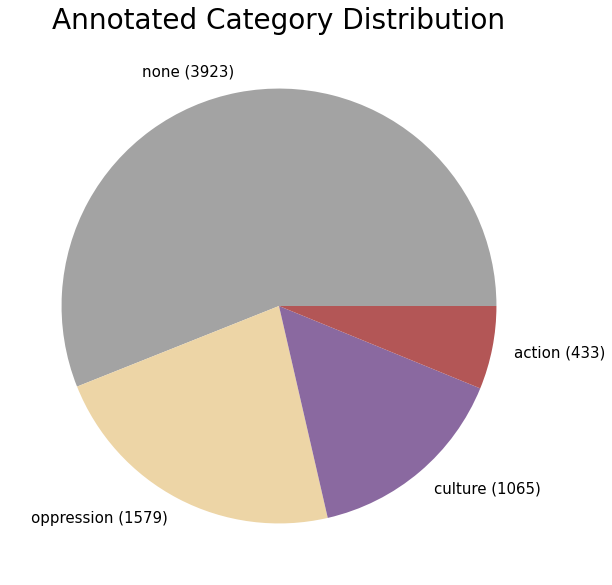

In [6]:
# Distribution of each category
plt.figure(figsize=(10, 10))
plt.title("Annotated Category Distribution", fontsize=28)
data_arr = [none_num, oppression_num, culture_num, action_num]
plt.pie(data_arr, colors=["#a3a3a3", "#edd5a6", "#8a69a0", "#b35656"], labels=[f"none ({none_num})", f"oppression ({oppression_num})", f"culture ({culture_num})", f"action ({action_num})"])

In [7]:
def get_sentiment(sentence):
    score = sia.polarity_scores(sentence)
    return score['compound']

get_sentiment("this guy is so dumb")

-0.6418

In [8]:
df['length_sentence'] = df['sentence'].apply(lambda x: len(x))
df['sentiment_sentence'] = df['sentence'].apply(get_sentiment)
df['is_provking'] = df['final'].apply(is_provoking)
df

,,,before,sentence,after,final,length_sentence,sentiment_sentence,is_provking
1,1,1002,* * When that Muslim When he came to attack 26...,* 4 * When those Muslims came to attack Parlia...,* * Even when those Muslims were going to figh...,oppression,88,-0.8225,provoking
2,2,1003,So these Muslim friends start visiting the hom...,His sisters or sisters-in-law begin to force him.,And how many such girls from Hindu families ar...,none,49,0.0000,not provoking
3,3,1004,His scattered remains were surely nurturing th...,"” Entered, broke the Shivling into pieces, and...",That property was estimated at two crore dirhams.,culture,101,-0.1280,provoking
4,4,1005,There is a lot of poison in the speech of Musl...,Muslims should change their instincts.,Muslims have got their desired thing in Pakist...,action,38,0.0000,provoking
5,5,1006,There is cold storage for 👉 👉 keeping your o...,"They buy potato, onion, ginger etc.",at very cheap prices directly from farmers dur...,none,35,0.0000,not provoking
...,...,...,...,...,...,...,...,...,...
6996,2997,197,"From the ""Ganga-Jamuni Tehzeeb"", drunken Hindu...","More recently, you may have seen the ""Abu Bakr...","Like the goats in Pakistan, Hindu girls would ...",oppression,142,0.0000,provoking
6997,2998,198,In this way he says that when the world adopts...,* It is clear from these four examples how wro...,* The great prophet Savarkar * In 1952 Savarka...,none,119,-0.1280,not provoking
6998,2999,199,The Islamic view of looking at the borders of ...,"In his view, atheist means one who does not be...","Islam is not just a religion, in fact Islam is...",culture,140,0.0000,provoking
6999,,,"We should not be 📲 📱 begging anyone, we know...",🚩 _ * * 🚩 🕉 🕉 ⚜ ⛳ ⚜ - 😬 Nurul Rahman Ba...,ूHindu cannot stop our Bangladeshi brothers fr...,action,92,0.0000,provoking


In [9]:
def plot_lengths(category, color):
    plt.figure()
    plt.title(f'"{category.title()}" lengths distribution', fontsize=28)
    plt.xlabel('Length of sentence (chars)')
    plt.ylabel('Number of sentences')
    print(f"AVG LEN FOR: {category}: {np.average(df[df['final'] == category]['length_sentence'])}")
    df[df['final'] == category]['length_sentence'].hist(color=color)

In [10]:
def get_avg_length(category):
    lst = df[df['final'] == category]['length_sentence']
    return sum(lst) / len(lst)

In [11]:
def get_avg_sentiment(category):
    lst = df[df['final'] == category]['sentiment_sentence']
    return sum(lst) / len(lst)

In [12]:
def plot_sentiment(category, color):
    plt.figure()
    plt.title(f'"{category.title()}" sentiment distribution', fontsize=28)
    plt.xlabel('Sentiment (0-1)')
    plt.ylabel('Number of sentences')
    print(f"AVG LEN FOR: {category}: {np.average(df[df['final'] == category]['sentiment_sentence'])}")
    df[df['final'] == category]['sentiment_sentence'].hist(color=color)

In [13]:
print("AVG SENTIMENT FOR OPPRESSION:", round(get_avg_sentiment('oppression'), 2))
print("AVG SENTIMENT FOR NONE:", round(get_avg_sentiment('none'), 2))
print("AVG SENTIMENT FOR CULTURE:", round(get_avg_sentiment('culture'), 2))
print("AVG SENTIMENT FOR ACTION:", round(get_avg_sentiment('action'), 2))

AVG SENTIMENT FOR OPPRESSION: -0.24
AVG SENTIMENT FOR NONE: -0.02
AVG SENTIMENT FOR CULTURE: -0.11
AVG SENTIMENT FOR ACTION: -0.04


In [14]:
print("AVG LENGTH FOR OPPRESSION:", get_sentiment('oppression'))
print("AVG LENGTH FOR NONE:", get_avg_length('none'))
print("AVG LENGTH FOR CULTURE:", get_avg_length('culture'))
print("AVG LENGTH FOR ACTION:", get_avg_length('action'))

AVG LENGTH FOR OPPRESSION: 0.0
AVG LENGTH FOR NONE: 96.19908233494775
AVG LENGTH FOR CULTURE: 132.65070422535211
AVG LENGTH FOR ACTION: 132.07621247113164


Text(0.5, 1.0, 'Length by category')

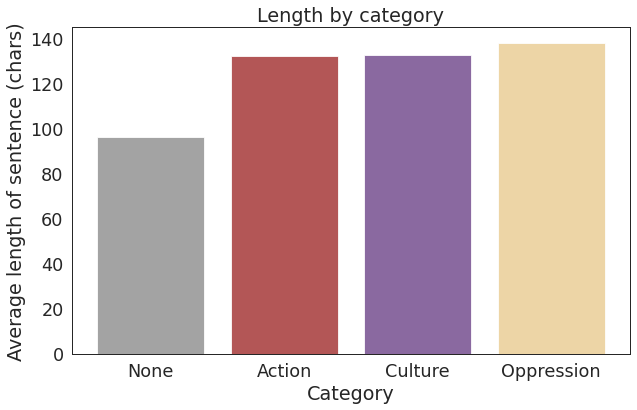

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(x=["None", "Action", "Culture", "Oppression"], height=[get_avg_length('none'), get_avg_length('action'), get_avg_length('culture'), get_avg_length('oppression')], color=["#a3a3a3", "#b35656", "#8a69a0",  "#edd5a6"])
plt.ylabel("Average length of sentence (chars)")
plt.xlabel("Category")
plt.title("Length by category")

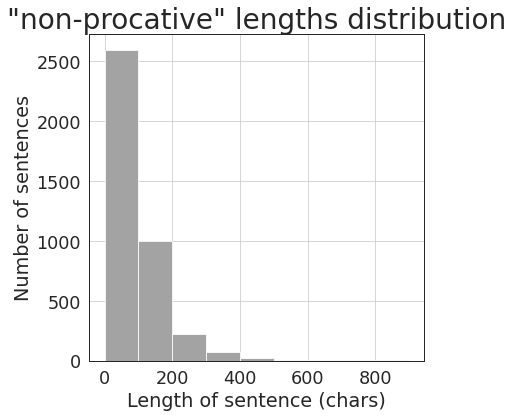

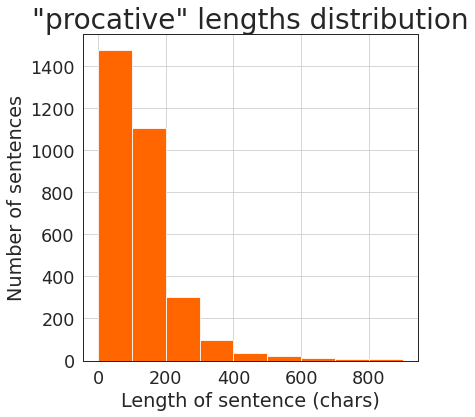

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


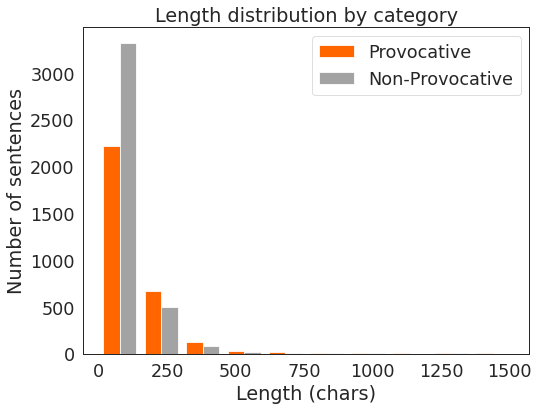

In [79]:
# plot the lengths of none vs. provocative sentences
non_prov = df[df['final'] == 'none']
prov = df[(df['final'] == 'culture') | (df['final'] == 'oppression') | (df['final'] == 'action')]

plt.figure()
plt.title(f'"non-procative" lengths distribution', fontsize=28)
plt.xlabel('Length of sentence (chars)')
plt.ylabel('Number of sentences')
non_prov['length_sentence'].hist(color="#a3a3a3", bins=[i for i in range(0, 1000, 100)])
plt.show()

plt.figure()
plt.title(f'"procative" lengths distribution', fontsize=28)
plt.xlabel('Length of sentence (chars)')
plt.ylabel('Number of sentences')
prov['length_sentence'].hist(color="#FF6600", bins=[i for i in range(0, 1000, 100)])
plt.show()

plt.figure(figsize=(8, 6))
plt.title("Length distribution by category")
plt.xlabel("Length (chars)")
plt.ylabel("Number of sentences")
plt.hist([prov['length_sentence'], non_prov['length_sentence']], color=["#FF6600", "#a3a3a3"], label=['Provocative', 'Non-Provocative'])
plt.legend()
plt.show()

In [ ]:
import numpy as np
print(np.average(prov['length_sentence']))
print(np.average(non_prov['length_sentence']))

135.25251868703282
96.19908233494775


AVG LEN FOR: oppression: 137.87840405319824
AVG LEN FOR: none: 96.19908233494775
AVG LEN FOR: culture: 132.65070422535211
AVG LEN FOR: action: 132.07621247113164


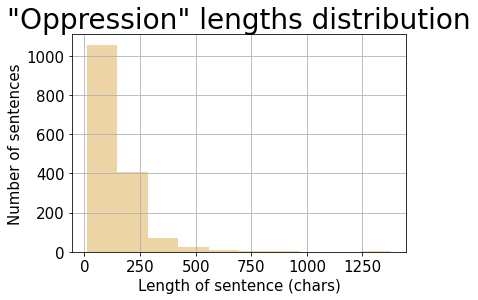

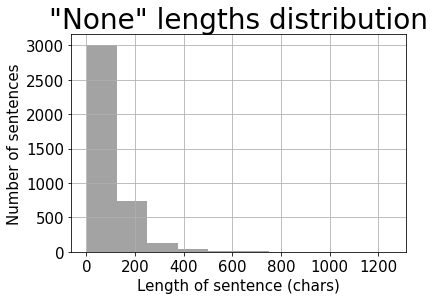

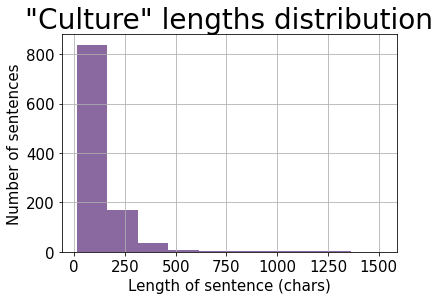

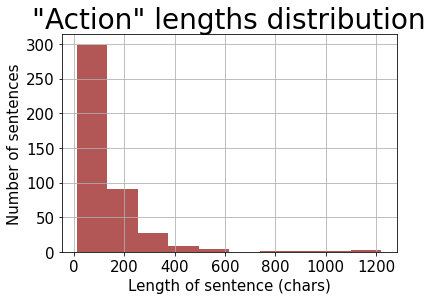

In [ ]:
plot_lengths('oppression', "#edd5a6")
plot_lengths('none', "#a3a3a3")
plot_lengths('culture', "#8a69a0")
plot_lengths('action',  "#b35656")

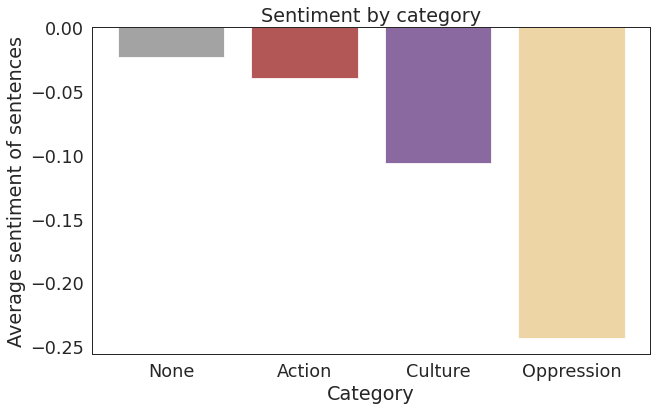

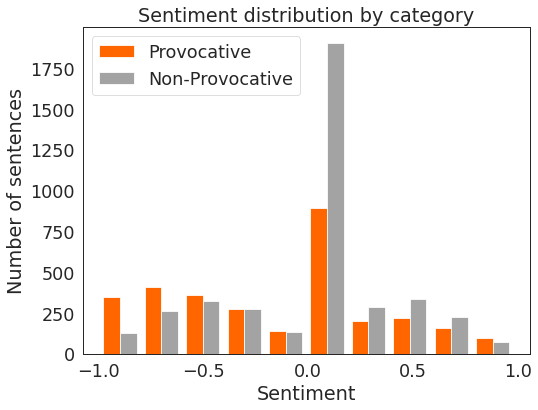

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(x=["None", "Action", "Culture", "Oppression"], height=[get_avg_sentiment('none'), get_avg_sentiment('action'), get_avg_sentiment('culture'), get_avg_sentiment('oppression')], color=["#a3a3a3", "#b35656", "#8a69a0",  "#edd5a6"])
plt.ylabel("Average sentiment of sentences")
plt.xlabel("Category")
plt.title("Sentiment by category")

plt.figure(figsize=(8, 6))
plt.title("Sentiment distribution by category")
plt.xlabel("Sentiment")
plt.ylabel("Number of sentences")
plt.hist([prov['sentiment_sentence'], non_prov['sentiment_sentence']], color=["#FF6600", "#a3a3a3"], label=['Provocative', 'Non-Provocative'])
plt.legend()
plt.show()

AVG LEN FOR: oppression: -0.2435384420519316
AVG LEN FOR: none: -0.023132500637267395
AVG LEN FOR: culture: -0.10625173708920188
AVG LEN FOR: action: -0.03968983833718244


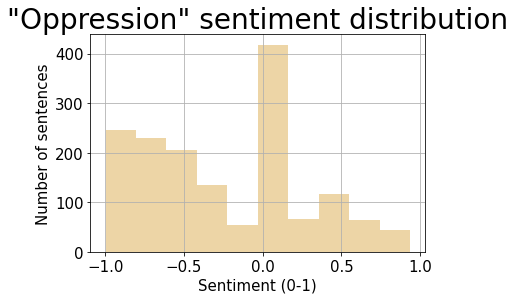

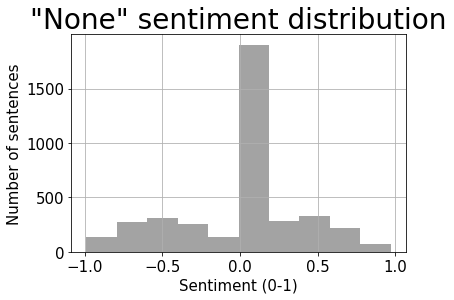

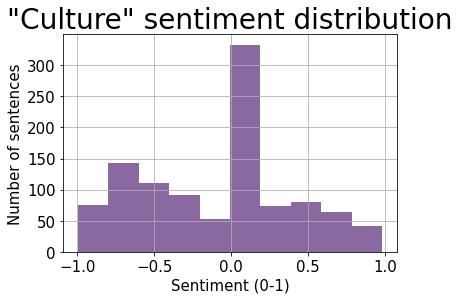

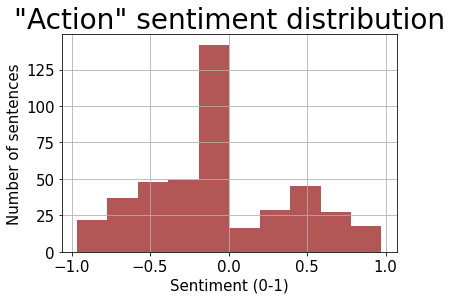

In [ ]:
plot_sentiment('oppression', "#edd5a6")
plot_sentiment('none', "#a3a3a3")
plot_sentiment('culture', "#8a69a0")
plot_sentiment('action',  "#b35656")

In [ ]:
def plot_sentiment(thing, color):
    plt.figure(figsize=(10 6))
    plt.title(thing + ' sentences')
    plt.title(f'"{thing.title()}" sentiment distribution', fontsize=28)
    plt.xlabel('Sentiment (0-1)')
    plt.ylabel('Number of sentences')
    df[df['is_provking'] == thing]['sentiment_sentence'].hist(color=color)
    print("Average sentiment for", thing, ":", np.average(df[df['is_provking'] == thing]['sentiment_sentence']))

SyntaxError: ignored

Average sentiment for provoking : -0.16733539161520963
Average sentiment for not provoking : -0.023132500637267395


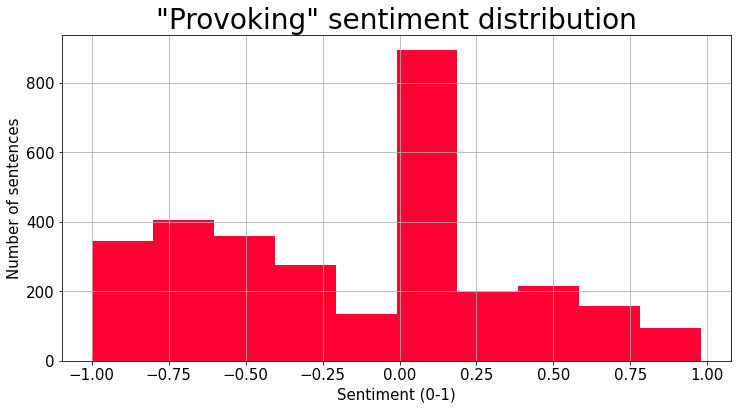

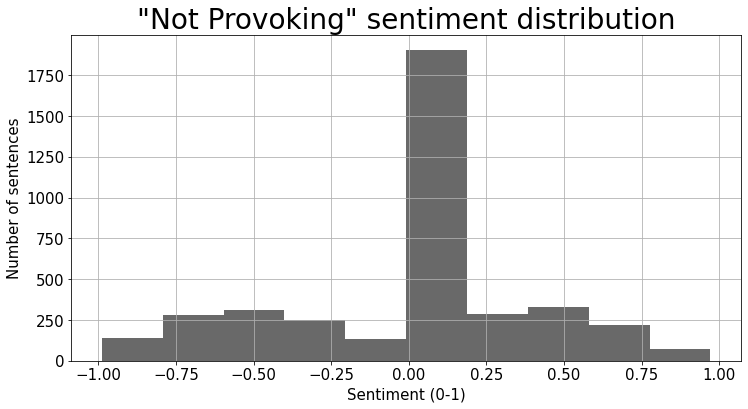

In [ ]:
plot_sentiment('provoking', (1, 0, 0.2))
plot_sentiment('not provoking', (0.41, 0.41, 0.41))

## Word Cloud

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
befores = df["before"]
sentence = df["sentence"]
afters = df["after"]

In [21]:
oppressions = []
cultures = []
actions = []
nones = []

for i in range(1, len(df) + 1):
    row = df.loc[i]
    if row.final == 'oppression':
        oppressions.append(row.sentence)
    elif row.final == 'culture':
        cultures.append(row.sentence)
    elif row.final == 'action':
        actions.append(row.sentence)
    else:
        nones.append(row.sentence)

In [ ]:
from PIL import Image
import string
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import numpy as np
import requests

In [ ]:
# see if I can eliminate "Hindu", "Muslim", and "India" from wordclouds
general_remove = ["hindu", "muslim", "india", "hindus", "muslims"]

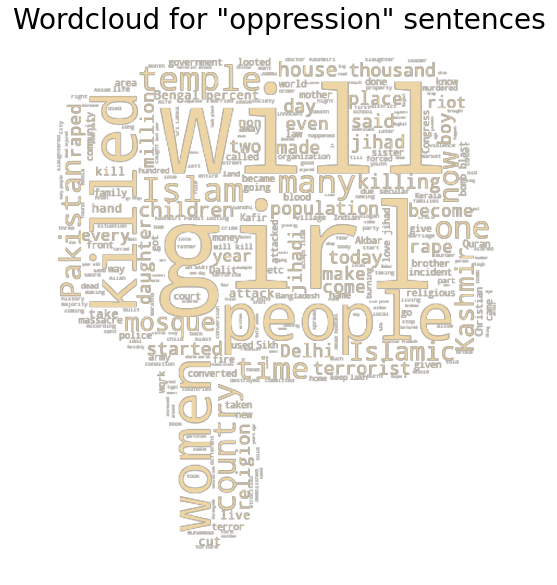

In [ ]:
# Generate a word cloud image
def oppression_color(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    return "#edd5a6"

stopwords = set(STOPWORDS)
url = "https://i.imgur.com/Z6Ntr2L.png"
mask = np.array(np.array(Image.open(requests.get(url, stream=True).raw)))
wordcloud = WordCloud(stopwords=[*stopwords, *general_remove], background_color="rgba(0, 0, 0, 0)", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(oppressions))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.title('Wordcloud for "oppression" sentences', fontsize=28)
plt.imshow(wordcloud.recolor(color_func=oppression_color), interpolation="bilinear")
plt.axis("off")
plt.show()

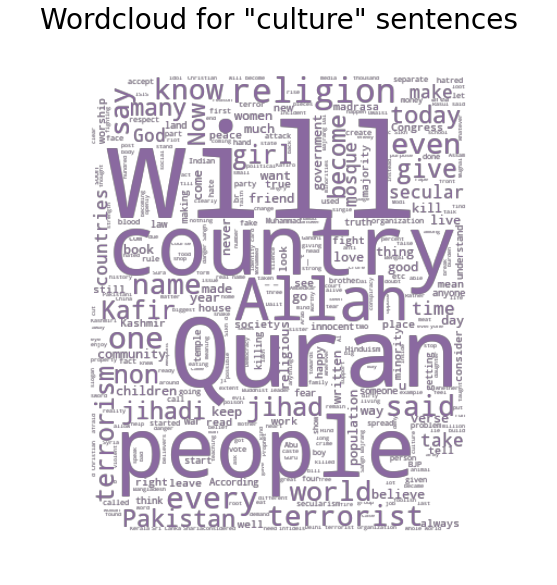

In [ ]:
# Generate a word cloud image
def culture_color(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    return "#8a69a0"

stopwords = set(STOPWORDS)
url = "https://i.imgur.com/XJjIux0.png"
mask = np.array(np.array(Image.open(requests.get(url, stream=True).raw)))
wordcloud = WordCloud(stopwords=[*stopwords, *general_remove, "islam", "islamic"], background_color="rgba(0, 0, 0, 0)", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(cultures))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.title('Wordcloud for "culture" sentences', fontsize=28)

plt.imshow(wordcloud.recolor(color_func=culture_color), interpolation="bilinear")
plt.axis("off")
# store to file
plt.show()

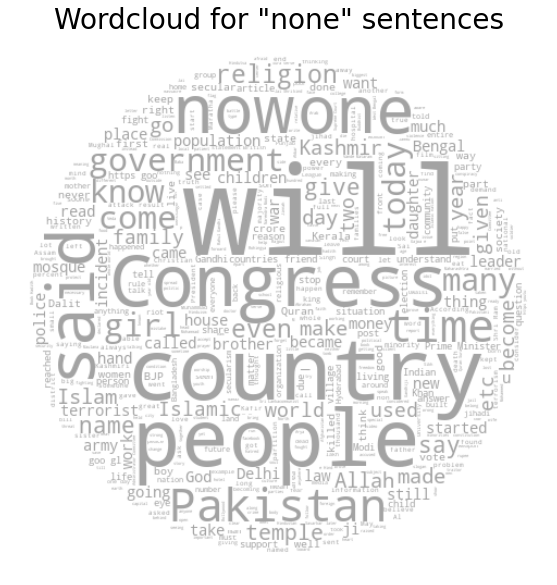

In [ ]:
# Generate a word cloud image
def none_color(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    return "#a3a3a3"


stopwords = set(STOPWORDS)
url = "https://i.imgur.com/TYZG7Tx.png"
mask = np.array(np.array(Image.open(requests.get(url, stream=True).raw)))
wordcloud = WordCloud(stopwords=[*stopwords, *general_remove], background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(nones))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.title('Wordcloud for "none" sentences', fontsize=28)

plt.imshow(wordcloud.recolor(color_func=none_color), interpolation="bilinear")
plt.axis("off")
# store to file
plt.show()

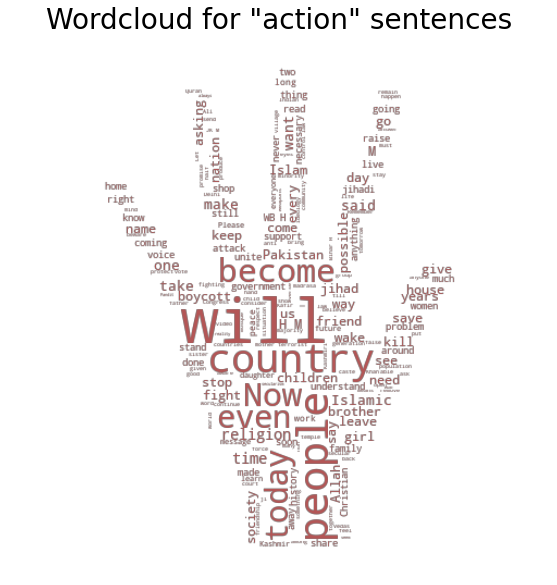

In [ ]:
# Generate a word cloud image
def action_color(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    return "#b35656"

stopwords = set(STOPWORDS)
url = "https://i.imgur.com/31DzxRP.png"
mask = np.array(np.array(Image.open(requests.get(url, stream=True).raw)))
wordcloud = WordCloud(stopwords=[*stopwords, *general_remove], background_color="rgba(0, 0, 0, 0)", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(actions))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.title('Wordcloud for "action" sentences', fontsize=28)


plt.imshow(wordcloud.recolor(color_func=action_color), interpolation="bilinear")
plt.axis("off")
# store to file
plt.show()

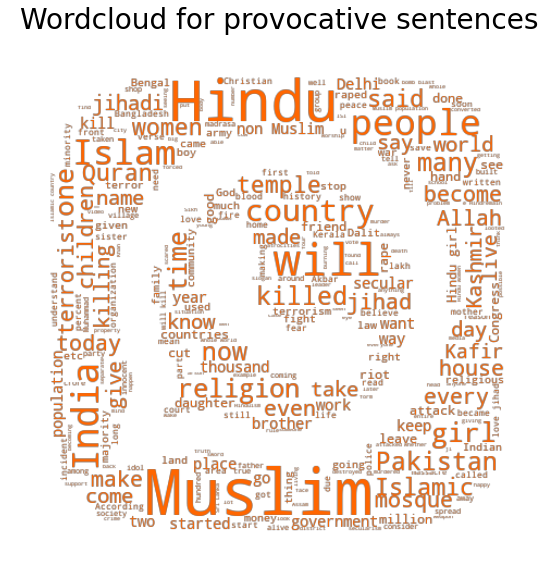

In [ ]:
def color_fun(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    return "hsl(24, 100%, 50%)"


full_lst = [*oppressions, *cultures, *actions]

url = "https://i.imgur.com/iB9RuzF.png"
mask = np.array(np.array(Image.open(requests.get(url, stream=True).raw)))
wordcloud = WordCloud(stopwords=[*stopwords], background_color="rgba(0, 0, 0, 0)", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(full_lst))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.title('Wordcloud for provocative sentences', fontsize=28)

plt.imshow(wordcloud.recolor(color_func=color_fun), interpolation="bilinear")
plt.axis("off")
# store to file
plt.show()

## Toxicity 

In [17]:
from googleapiclient import discovery
import json
import random
import matplotlib.pyplot as plt

In [18]:
CLOUD_API_KEY = "<API_KEY>"

In [19]:
client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=CLOUD_API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
)

def get_toxicity_values(lst):
    scores = []
    lst_sample = random.sample(lst, 60) # only look at 60
    for text in lst_sample:
        analyze_request = {
            'comment': { 'text': text },
            'requestedAttributes': {'TOXICITY': {}}
        }

        try:
            response = client.comments().analyze(body=analyze_request).execute()
            score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
            scores.append(score)
        except:
            try_again = random.sample(lst, 60)[0]
            analyze_request = {
                'comment': { 'text': try_again },
                'requestedAttributes': {'TOXICITY': {}}
            }
            response = client.comments().analyze(body=analyze_request).execute()
            score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
            scores.append(score)
            pass

    
    return scores

In [22]:
none_scores = get_toxicity_values(nones)

In [23]:
len(none_scores)

60

In [35]:
action_scores = get_toxicity_values(actions)

In [36]:
len(action_scores)

60

In [51]:
oppression_scores = get_toxicity_values(oppressions)

In [52]:
len(oppression_scores)

60

In [53]:
culture_scores = get_toxicity_values(cultures)


In [54]:
print(f"the lengths of these are: {len(none_scores)}, {len(action_scores)}, {len(oppression_scores)}, {len(culture_scores)}")

the lengths of these are: 60, 60, 60, 60


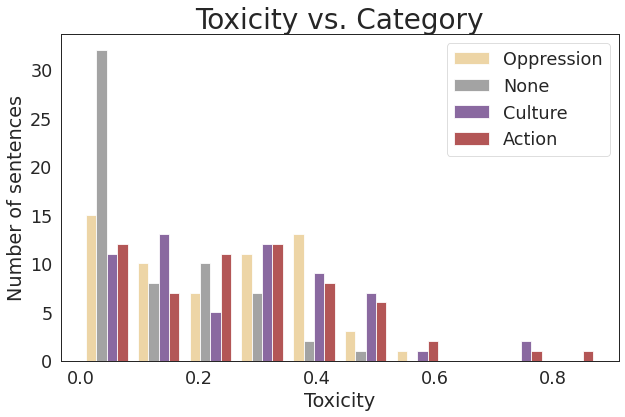

In [55]:
plt.figure(figsize=(10, 6))
plt.title("Toxicity vs. Category", fontsize=28)
plt.hist([oppression_scores, none_scores, culture_scores, action_scores], label=["Oppression", "None", "Culture", "Action"], color=["#edd5a6", "#a3a3a3", "#8a69a0", "#b35656"])
plt.ylabel("Number of sentences")
plt.xlabel("Toxicity")
plt.legend(loc='upper right')
plt.show()

In [86]:
# Average Toxicity
def avg_lst(lst):
    return round(sum(lst) / len(lst), 2)


print(f"Average None toxicity: {avg_lst(none_scores)}")
print(f"Average Action toxicity: {avg_lst(action_scores)}")
print(f"Average Culture toxicity: {avg_lst(culture_scores)}")
print(f"Average Oppression toxicity: {avg_lst(oppression_scores)}")

Average None toxicity: 0.13
Average Action toxicity: 0.27
Average Culture toxicity: 0.26
Average Oppression toxicity: 0.23


Text(0.5, 1.0, 'Toxicity score by category')

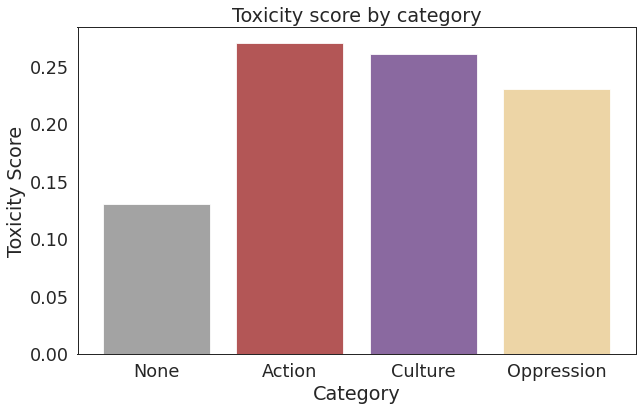

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(x=["None", "Action", "Culture", "Oppression"], height=[avg_lst(none_scores), avg_lst(action_scores), avg_lst(culture_scores), avg_lst(oppression_scores)], color=["#a3a3a3", "#b35656", "#8a69a0",  "#edd5a6"])
plt.ylabel("Toxicity Score")
plt.xlabel("Category")
plt.title("Toxicity score by category")

## Empath

In [26]:
!pip install empath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 1.7 MB/s 
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57821 sha256=1f3c6c135e7a989da1ddc0c40615da5c09bb594b095855a0104b41cfc2b7ae1e
  Stored in directory: /root/.cache/pip/wheels/2b/78/a8/37d4505eeae79807f4b5565a193f7cfcee892137ad37591029
Successfully built empath


In [27]:
from empath import Empath
from tqdm import tqdm,tqdm_notebook


In [28]:
lexicon = Empath()

def get_empath_categories(df,normalize=False): 
    tuples=[]
    for index,row in tqdm(df.iterrows(),total=len(df)):
        dict_lexicon=lexicon.analyze(row['sentence'], normalize=normalize)
        try:
            temp=dict_lexicon.values()
        except AttributeError:
            dict_lexicon=lexicon.analyze("sample text", normalize=normalize)
        temp=list(dict_lexicon.values())+[index, row['final']]
        tuples.append(temp)
        
    df_empath=pd.DataFrame(tuples,columns=list(dict_lexicon.keys())+['org_index','label'])
    
    
    print(len(df),len(df_empath))
    df=df.reset_index(drop=True)
    #df_with_empath=pd.concat([df,df_empath],axis=1)
    return df_empath

In [29]:
annotated_df_empath=get_empath_categories(df,normalize=True)

100%|██████████| 7000/7000 [01:52<00:00, 62.36it/s]


7000 7000


In [30]:
annotated_df_empath = pd.melt(annotated_df_empath,id_vars="label",var_name="category", value_name="normalized_value")
annotated_df_empath=annotated_df_empath[annotated_df_empath['category']!='org_index']
annotated_df_empath.head()

,label,category,normalized_value
0,oppression,help,0.0
1,none,help,0.0
2,culture,help,0.0
3,action,help,0.0
4,none,help,0.0


In [31]:
import matplotlib
import seaborn as sns
from scipy.stats import mannwhitneyu


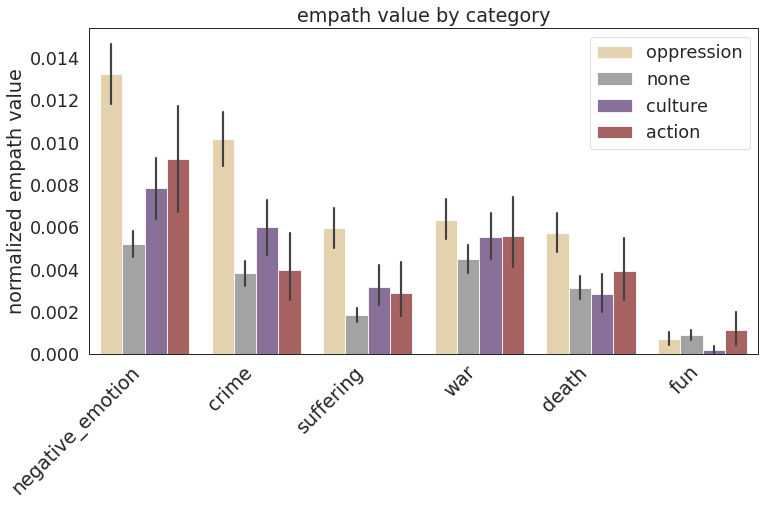

In [50]:
categories=["negative_emotion", "crime", "suffering", "war", "death", "fun"]

matplotlib.rcParams['figure.figsize'] = (6,6)

sns.set(context='paper',style='white',font_scale=1.5)

temp=annotated_df_empath[annotated_df_empath['category'].isin(categories)]
font = {
    'weight' : 'normal',
    'size'   : 11}

plt.figure(figsize=(12, 6))
colors = ["#edd5a6", "#a3a3a3", "#8a69a0", "#b35656"]
sns.set(context='paper',style='white',font_scale=2.0)
g = sns.barplot(x="category", y="normalized_value",hue='label', palette=colors,order=categories,data=temp)

# g=add_values(g,df_admin,15,order_list)
# plt.ylabel('number of groups as admin')
g.set_xticklabels(
        g.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='normal',
        fontsize='medium'

    )

# xlist_label=[]

# list_p_vals=[]

# for cat in categories:
#     temp=annotated_df_empath[annotated_df_empath['category']==cat]
#     treatment=np.array(temp[temp['label']=='oppression'].normalized_value)
#     control=np.array(temp[temp['label']=='none'].normalized_value)
#     # generate two independent samples
#     # compare samples
#     stat, p = mannwhitneyu(treatment, control)
#     list_p_vals.append(p)
#     if(cat == 'negative_emotion'):
#         cat='neg_emo'
    
# #     if(p<=0.00001):
# #         cat=cat+" ****"
#     if(p<=0.0001):
#         cat=cat+" (***)"
#     elif(p<=0.001):
#         cat=cat+" (**)"
#     elif(p<0.01):
#         cat=cat+" (*)"
   
        
#     xlist_label.append(cat)

    
    

# plt.axvline(7.5, linestyle='--',alpha=0.9, color='r',linewidth=1.5)
# plt.xticks(ticks=range(0,len(categories)),labels=xlist_label)
plt.title("empath value by category")
plt.xlabel("")
plt.ylabel("normalized empath value")
plt.legend()
plt.show()


## Topic modeling (LDA)


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense

go


In [ ]:
import pandas as pd
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [ ]:
def extract_topics(category_lst):
    processed_docs = []

    for doc in category_lst:
        processed_docs.append(preprocess(doc))

    dictionary = gensim.corpora.Dictionary(processed_docs)
    dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000) # optional
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    document_num = 20
    bow_doc_x = bow_corpus[document_num]

    # for i in range(len(bow_doc_x)):
    #     print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
    #                                                     dictionary[bow_doc_x[i][0]], 
    #                                                     bow_doc_x[i][1]))
        
    # LDA mono-core -- fallback code in case LdaMulticore throws an error on your machine
    # lda_model = gensim.models.LdaModel(bow_corpus, 
    #                                    num_topics = 10, 
    #                                    id2word = dictionary,                                    
    #                                    passes = 50)

    # LDA multicore 
    '''
    Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
    '''
    # TODO
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                    num_topics = 5, 
                                    id2word = dictionary,                                    
                                    passes = 10,
                                    workers = 2)
    
    '''
    For each topic, we will explore the words occuring in that topic and its relative weight
    '''
    # for idx, topic in lda_model.print_topics(-1):
    #     # print("Topic: {} \nWords: {}".format(idx, topic ))
    #     print(topic)
    #     print("\n")


    from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

    lda_topics = lda_model.show_topics(num_words=10)

    topics = []
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

    for topic in lda_topics:
        topics.append(preprocess_string(topic[1], filters))

    for i in range(len(topics)):
        print(f"Topic {i}: {topics[i]}") # ordered with most important word first


In [ ]:
extract_topics(cultures)

Topic 0: ['countri', 'religion', 'terror', 'mosqu', 'children', 'work', 'hous', 'give', 'women', 'know']
Topic 1: ['hindu', 'kill', 'pakistan', 'india', 'communiti', 'tell', 'christian', 'today', 'start', 'go']
Topic 2: ['allah', 'say', 'quran', 'secular', 'terrorist', 'vers', 'peopl', 'world', 'know', 'sura']
Topic 3: ['india', 'jihad', 'kafir', 'write', 'consid', 'time', 'happi', 'believ', 'like', 'quran']
Topic 4: ['peopl', 'jihadi', 'organ', 'year', 'friend', 'minor', 'fight', 'know', 'good', 'terrorist']


In [ ]:
extract_topics(oppressions)

Topic 0: ['say', 'popul', 'burn', 'kashmir', 'take', 'bodi', 'go', 'like', 'place', 'dead']
Topic 1: ['peopl', 'year', 'terrorist', 'india', 'countri', 'percent', 'terror', 'attack', 'pakistan', 'children']
Topic 2: ['bomb', 'blast', 'convert', 'govern', 'bengal', 'young', 'today', 'dalit', 'injur', 'loot']
Topic 3: ['women', 'delhi', 'girl', 'know', 'famili', 'akbar', 'rap', 'live', 'kashmir', 'children']
Topic 4: ['girl', 'india', 'templ', 'jihad', 'countri', 'love', 'come', 'mosqu', 'attack', 'break']


In [ ]:
extract_topics(nones)

Topic 0: ['say', 'pakistan', 'today', 'allah', 'minist', 'like', 'call', 'go', 'write', 'build']
Topic 1: ['come', 'time', 'know', 'india', 'give', 'year', 'secular', 'peopl', 'govern', 'histori']
Topic 2: ['hindu', 'religion', 'hindus', 'live', 'think', 'happen', 'templ', 'armi', 'countri', 'popul']
Topic 3: ['congress', 'hindus', 'islam', 'india', 'https', 'countri', 'nation', 'vote', 'book', 'terrorist']
Topic 4: ['hindu', 'countri', 'girl', 'brother', 'famili', 'work', 'reach', 'leav', 'hand', 'consid']


In [ ]:
extract_topics(actions)

Topic 0: ['peopl', 'religion', 'wake', 'want', 'friend', 'countri', 'today', 'india', 'islam', 'brother']
Topic 1: ['countri', 'islam', 'stop', 'kill', 'children', 'like', 'today', 'want', 'peopl', 'leav']
Topic 2: ['say', 'fight', 'brother', 'time', 'kill', 'peopl', 'leav', 'want', 'stop', 'like']
Topic 3: ['india', 'time', 'need', 'countri', 'brother', 'want', 'come', 'islam', 'like', 'wake']
Topic 4: ['come', 'support', 'leav', 'today', 'time', 'want', 'friend', 'children', 'religion', 'fight']
